L2 regularization (also known as Ridge Regularization) is a technique in machine learning and statistics that helps prevent a model from overfitting by adding a penalty term to the loss function.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model with L2 regularization (default: penalty='l2')
model = LogisticRegression(penalty='l2', C=0.1)  # Smaller C = stronger regularization
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")


Accuracy: 95.56%


L2 regularization code in deep learning

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.8608 - loss: 1.0642 - val_accuracy: 0.9578 - val_loss: 0.4119
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9615 - loss: 0.3645 - val_accuracy: 0.9581 - val_loss: 0.3082
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9681 - loss: 0.2639 - val_accuracy: 0.9692 - val_loss: 0.2315
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9727 - loss: 0.2167 - val_accuracy: 0.9702 - val_loss: 0.2175
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9735 - loss: 0.1997 - val_accuracy: 0.9728 - val_loss: 0.1980
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9759 - loss: 0.1853 - val_accuracy: 0.9613 - val_loss: 0.2221
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9783 - loss: 0.1739 - val_accuracy: 0.9707 - val_loss: 0.1949
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9791 - loss: 0.1646 - va

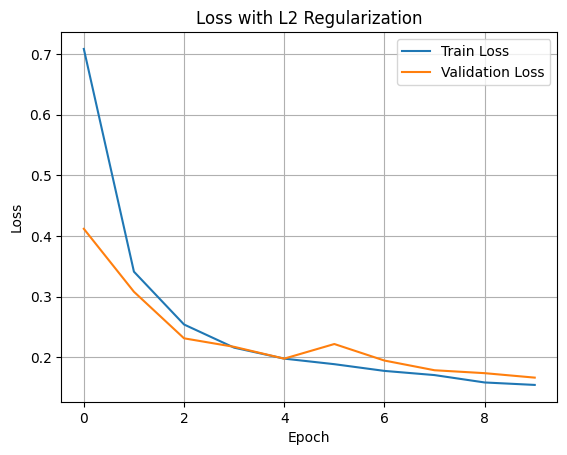

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define model with L2 regularization
model = Sequential([
    Dense(512, activation='relu', kernel_regularizer=l2(0.001), input_shape=(784,)),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(10, activation='softmax')  # Output layer (no regularization here)
])

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train,
                    validation_split=0.2,
                    epochs=10,
                    batch_size=128,
                    verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss with L2 Regularization')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
